In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# $2\times 2$ example

In [2]:
A=np.array([[1., 2.], 
            [2., -3.]])



U,s,VT=np.linalg.svd(A)
V=VT.T
print("U=\n"+str(U))
print("s=\n"+str(s))
print("V=\n"+str(V))

U=
[[-0.38268343  0.92387953]
 [ 0.92387953  0.38268343]]
s=
[3.82842712 1.82842712]
V=
[[ 0.38268343  0.92387953]
 [-0.92387953  0.38268343]]


<IPython.core.display.Javascript object>


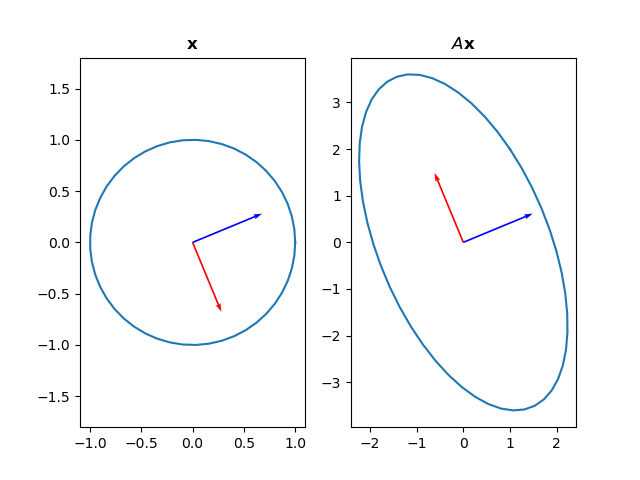

In [3]:
theta=np.linspace(0, 2*np.pi)
x=np.cos(theta)
y=np.sin(theta)

Ax=A@(np.stack((x,y)))


fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x,y)
ax1.axis('equal')
ax1.quiver([0,0], [0,0], V[0,:],V[1,:], color=['red', 'blue'], scale=3)
ax1.set_title('$\mathbf{x}$')

ax2.plot(Ax[0,:], Ax[1,:])
ax2.axis('equal')
ax2.quiver([0,0], [0,0], U[0,:], U[1,:], color=['red', 'blue'], scale=3)
ax2.set_title('$A\mathbf{x}$')

fig.show()

### $2\times 3$ example

In [5]:
A=np.array([[ 1., 1., -1.], 
            [ 1., -1., -1.]])

U,s,VT=np.linalg.svd(A)
V=VT.T
print("U=\n"+str(U))
print("s=\n"+str(s))
print("V=\n"+str(V))

U=
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
s=
[2.         1.41421356]
V=
[[ 7.07106781e-01  1.45498115e-16  7.07106781e-01]
 [-4.22090053e-17 -1.00000000e+00 -3.85708718e-17]
 [-7.07106781e-01 -1.17742539e-16  7.07106781e-01]]


<IPython.core.display.Javascript object>


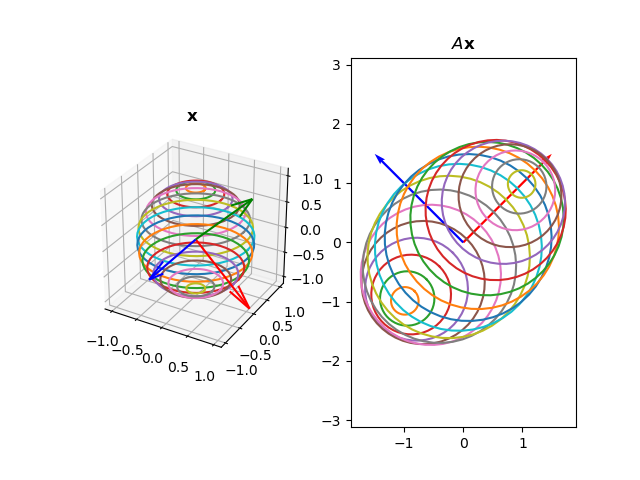

In [6]:
phi=np.linspace(0, 2*np.pi)
theta = np.linspace(0, np.pi, 20)
PHI, THETA = np.meshgrid(phi, theta)


x=np.cos(PHI)*np.sin(THETA)
y=np.sin(PHI)*np.sin(THETA)
z=np.cos(THETA)


Ax1=A[0,0]*x+A[0,1]*y+A[0,2]*z
Ax2=A[1,0]*x+A[1,1]*y+A[1,2]*z

fig = plt.figure()

ax1=fig.add_subplot(121, projection='3d')

for xl,yl,zl in zip(x,y,z):
    ax1.plot(xl,yl,zl)

## Getting aspect ratios right in 3d pyplot is clunky. Source: https://github.com/matplotlib/matplotlib/issues/17172
xyzlim = np.array([ax1.get_xlim3d(),ax1.get_ylim3d(),ax1.get_zlim3d()]).T
XYZlim = [min(xyzlim[0]),max(xyzlim[1])]
ax1.set_xlim3d(XYZlim)
ax1.set_ylim3d(XYZlim)
ax1.set_zlim3d(XYZlim)
ax1.set_box_aspect((1,1,1))

## Coloring arrows are also clunky. Source: https://stackoverflow.com/a/43414969
orig=[0,0,0]
ax1.quiver(orig,orig,orig, V[0,:],V[1,:], V[2,:], color = ['red', 'blue', 'green', *['red']*2, *['blue']*2, *['green']*2], length=1.5)

ax1.set_title('$\mathbf{x}$')



ax2=fig.add_subplot(122)

for xl,yl in zip(Ax1,Ax2):
    ax2.plot(xl,yl)
ax2.quiver([0,0], [0,0], U[0,:],U[1,:], color=['red', 'blue'], scale=1.8, width=0.01)
ax2.axis('equal')
ax2.set_title('$A\mathbf{x}$')


fig.show()

### $3\times 2$ example

In [7]:
A=np.array([[ 1.,  1.], 
            [ 1.,  1.],
            [ 1., -1.]])

U,s,VT=np.linalg.svd(A)
V=VT.T
print("U=\n"+str(U))
print("s=\n"+str(s))
print("V=\n"+str(V))

U=
[[-7.07106781e-01 -2.22044605e-16 -7.07106781e-01]
 [-7.07106781e-01 -1.11022302e-16  7.07106781e-01]
 [-5.55111512e-17  1.00000000e+00 -2.25745422e-16]]
s=
[2.         1.41421356]
V=
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


<IPython.core.display.Javascript object>


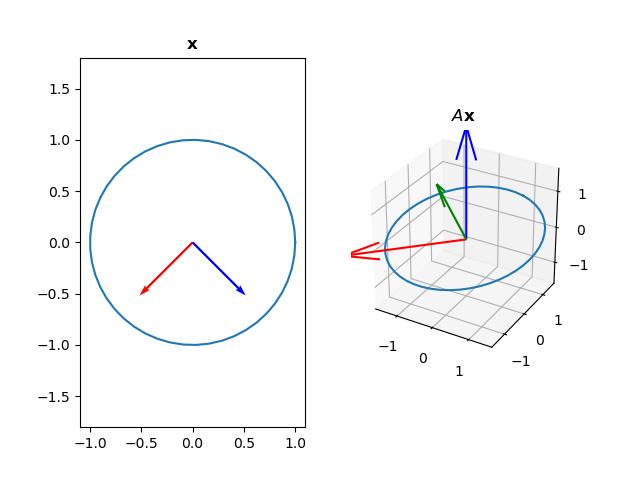

In [8]:
theta=np.linspace(0, 2*np.pi)
x=np.cos(theta)
y=np.sin(theta)

Ax=A@(np.stack((x,y)))


fig = plt.figure()

ax1=fig.add_subplot(121)
ax1.plot(x,y)
ax1.axis('equal')
ax1.quiver([0,0], [0,0], V[0,:],V[1,:], color=['red', 'blue'], scale=3, width=0.01)
ax1.set_title('$\mathbf{x}$')

orig=[0,0,0]
ax2=fig.add_subplot(122, projection='3d')
ax2.plot(Ax[0,:], Ax[1,:], Ax[2,:])


## Getting aspect ratios right in 3d pyplot is clunky. Source: https://github.com/matplotlib/matplotlib/issues/17172
xyzlim = np.array([ax2.get_xlim3d(),ax2.get_ylim3d(),ax2.get_zlim3d()]).T
XYZlim = [min(xyzlim[0]),max(xyzlim[1])]
ax2.set_xlim3d(XYZlim)
ax2.set_ylim3d(XYZlim)
ax2.set_zlim3d(XYZlim)
ax2.set_box_aspect((1,1,1))


## Coloring arrows are also clunky. Source: https://stackoverflow.com/a/43414969
ax2.quiver(orig,orig,orig, U[0,:],U[1,:], U[2,:], color = ['red', 'blue', 'green', *['red']*2, *['blue']*2, *['green']*2], length=3)
ax2.set_title('$A\mathbf{x}$')


fig.show()